<a href="https://colab.research.google.com/github/tahaShm/LTI-system-signals/blob/master/signal_ca2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taha shabani - 810196491 - signal ca2

question 1


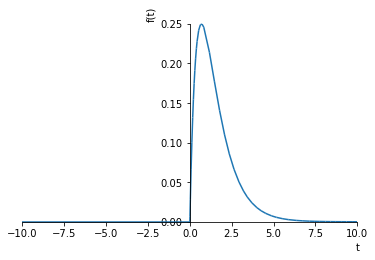

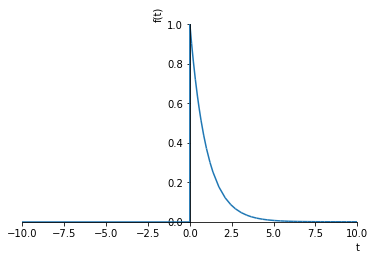

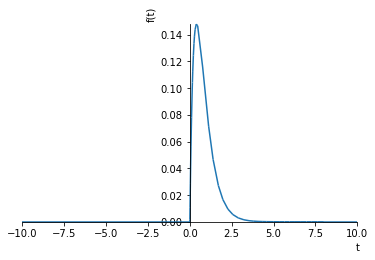

In [ ]:
import sympy as sym

t = sym.symbols('t')
tt = sym.Symbol('tt')

def odeFucntion(xVal, x, y) : 
  ode = sym.Eq(y + y.diff(t), x)
  ode = ode.subs(x, xVal)
  return ode
def generateFunction(definition) : 
  x = sym.Function('x')(t)
  y = sym.Function('y')(t)
  ode = odeFucntion(definition, x,y)
  sol = sym.dsolve(ode)
  consts = sym.solve((sol.rhs.limit(t, 0, '-'), sol.rhs.diff(t).limit(t, 0, '-')), 'C1')
  sol = sol.subs(consts)
  return sol.rhs



u = sym.Heaviside(t) #u(t)
delta = sym.DiracDelta(t) #delta(t)

h = generateFunction(delta)
x = generateFunction(u*sym.exp(-2*t))

def convolveHAndX():
  x1 = u*sym.exp(-2*t) #x(t)
  h1 = h.subs(t, t-tt) #h(tt - t)
  conv = sym.integrate(x1 * h1, (tt, 0, t))
  return conv

y = convolveHAndX() #y(t) = x(t) * h(t)

sym.plot(x)
sym.plot(h)
sym.plot(y)


1- بله همان است

2- با توجه به کانولوشن که در هر دو حالت یکسان است بله یکسان است

question 2


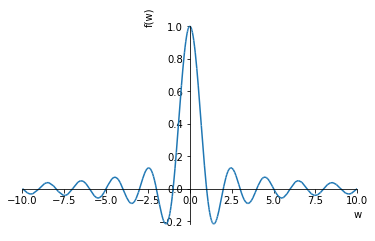

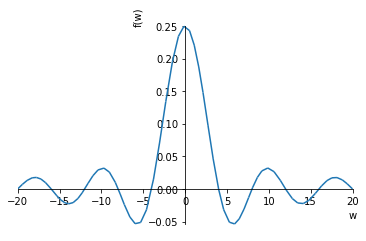

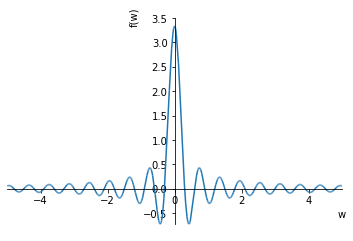

In [ ]:
t = sym.symbols('t')
w = sym.symbols('w')  

class rect(sym.Function):
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)
      
X1 = sym.fourier_transform(rect(t),t,w)
sym.plot(X1)

a = 4
X2 = sym.fourier_transform(rect(a*t),t,w)
sym.plot(X2, (w, -20, 20))

a = 0.3
X3 = sym.fourier_transform(rect(a*t),t,w)
sym.plot(X3, (w, -5, 5))

1- f(at) -> 1/|a| * F(w/a)

2- طبق توضیح بالا هم اندازه بیشینه و هم فرکانس نوسانات تغییر می‌کند

question 3


  part1


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


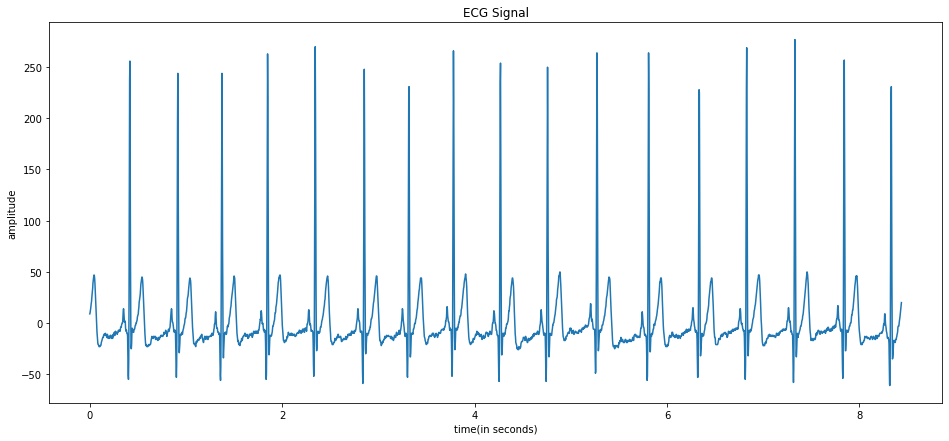

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt

ecgSignal = np.genfromtxt('/content/drive/My Drive/signal_csvs/ecg.csv')
ecgSignal = ecgSignal - ecgSignal.mean()

def generateX1(freq,ecgSignal):
  waveLength = 1 / freq
  arrVals = np.array([(i * waveLength) for i in range(ecgSignal.shape[0])])
  return arrVals

xVals = generateX1(333.34, ecgSignal)
yVals = ecgSignal

plt.figure(figsize=(16, 7))
plt.title("ECG Signal")
plt.xlabel("time(in seconds)")
plt.ylabel("amplitude")
plt.plot(xVals, yVals)
plt.show()

part2


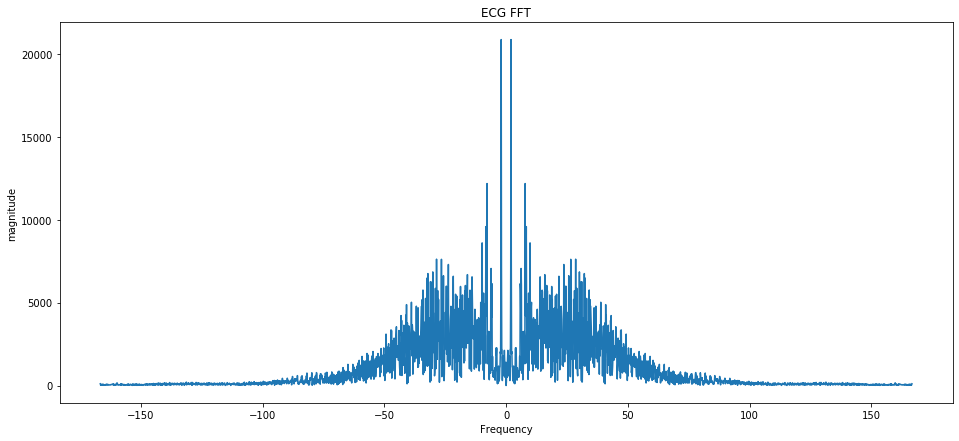

In [ ]:
def draw(plt, xVals, yVals, title, xlabel, ylabel):
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.plot(xVals, yVals)
  plt.show()
def generateFourierTransform(ecgSignal):
  transformed = np.fft.fft(ecgSignal)
  shiftedTransform = np.fft.fftshift(transformed)
  shiftedTransform = np.absolute(shiftedTransform)
  return shiftedTransform

def generateX2(freq, ecgSignal):
  waveLength = 1 / freq
  magnitudes = np.fft.fftfreq(ecgSignal.shape[0], waveLength)
  magnitudes = np.fft.fftshift(magnitudes)
  return magnitudes

xVal2 = generateX2(333.34, ecgSignal)
fourierTransform = generateFourierTransform(ecgSignal)
plt.figure(figsize=(16, 7))
draw(plt, xVal2, fourierTransform, "ECG FFT", "Frequency", "magnitude")

part3.1


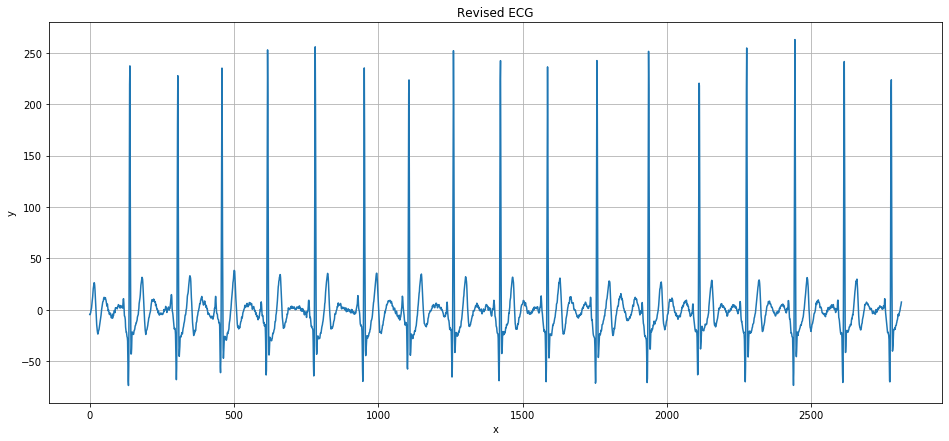

In [ ]:
def absolute(f):
  return np.real(f)

def getFourier(ecg):
  return np.fft.fft(ecg)

def reverseFourier(Y):
  return np.fft.ifft(Y)

def filterFor6(ecgF):
    xRange = 1 / 333.34
    ecgFSize = ecgF.shape[0]
    freqs = np.fft.fftfreq(ecgFSize, xRange)
    outF = np.ones((ecgFSize))
    for i in range(ecgFSize):
      if(-6 < freqs[i] < 6):
        outF[i] = 0
    filtered = outF * ecgF
    return reverseFourier(filtered)
    

x = filterFor6(getFourier(ecgSignal))
plt.figure(figsize=(16, 7))
plt.plot(absolute(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Revised ECG")
plt.grid()
plt.show()

part3.2


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


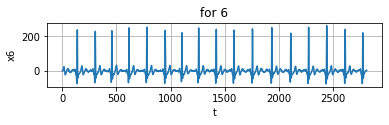

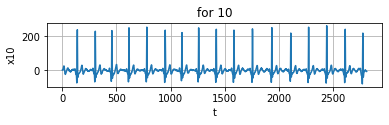

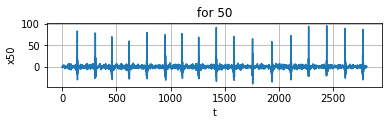

In [ ]:
from scipy import signal

widthDivFreq = 12 / 333.34
b6, a6 = signal.butter(6, Wn = [widthDivFreq], btype = 'highpass', output = 'ba') # backward compatibility
b10, a10 = signal.butter(10, Wn = [widthDivFreq], btype = 'highpass', output = 'ba')
b50, a50 = signal.butter(50, Wn = [widthDivFreq], btype = 'highpass', output = 'ba', analog = True)

filter6 = filterFor6(getFourier(ecgSignal))


x6 = signal.filtfilt(b6, a6, filter6)
x10 = signal.filtfilt(b10, a10, filter6)
x50 = signal.filtfilt(b50, a50, filter6)


plt.subplot(3, 1, 1)
plt.plot(x6)
plt.xlabel("t")
plt.ylabel("x6")
plt.title("for 6")
plt.grid()
plt.show()

plt.subplot(3, 1, 1)
plt.plot(x10)
plt.xlabel("t")
plt.ylabel("x10")
plt.title("for 10")
plt.grid()
plt.show()

plt.subplot(3, 1, 1)
plt.plot(x50)
plt.xlabel("t")
plt.ylabel("x50")
plt.title("for 50")
plt.grid()
plt.show()

part3.3


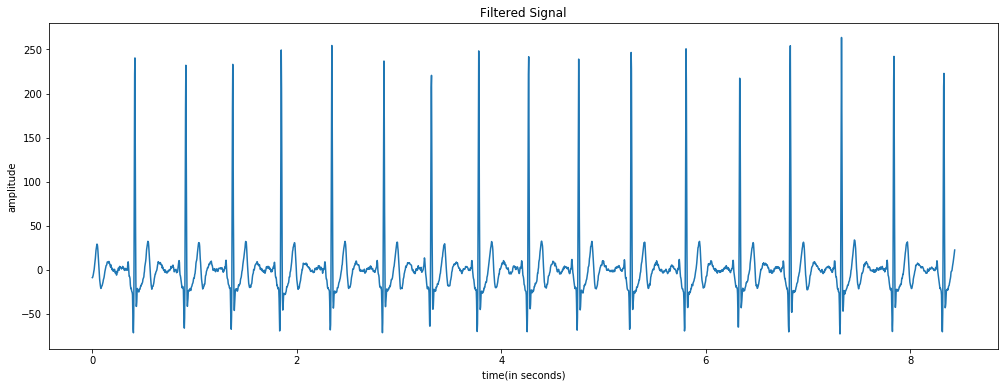

In [ ]:
def generateX(ecgSignal):
  waveLength = 1 / 333.34
  arrVals = np.array([(i * waveLength) for i in range(ecgSignal.shape[0])])
  return arrVals

filters = np.genfromtxt('/content/drive/My Drive/signal_csvs/filter.csv', delimiter=',')

newX = generateX(ecgSignal)
conv = np.convolve(ecgSignal, filters, mode="same")

plt.figure(figsize=(17, 6))
draw(plt, newX, conv, "Filtered Signal", "time(in seconds)", "amplitude")

question 4


b)


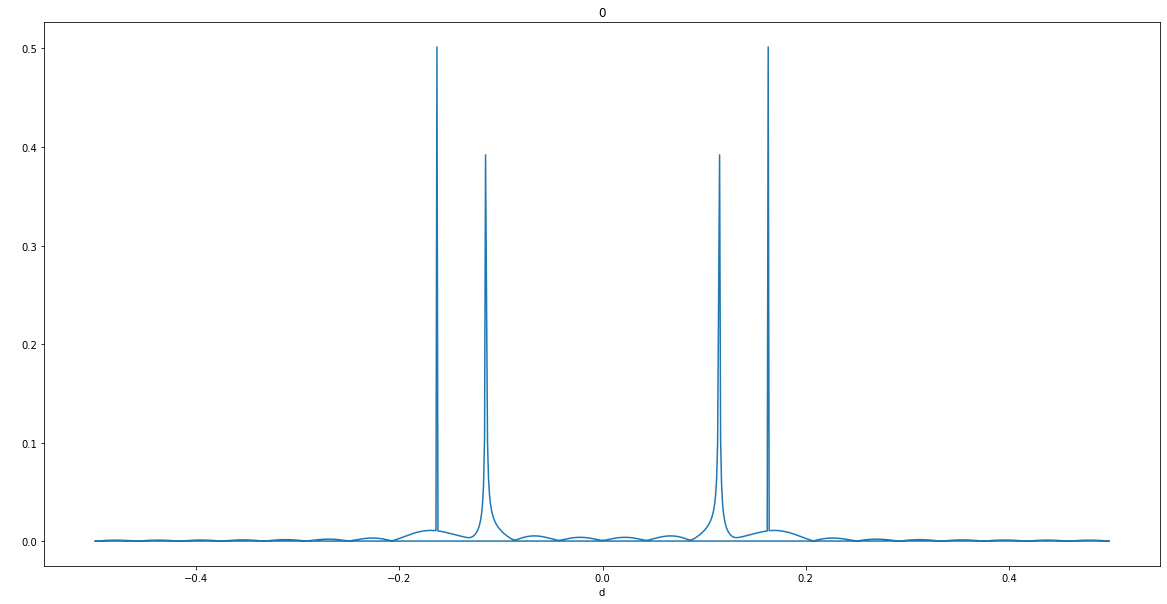

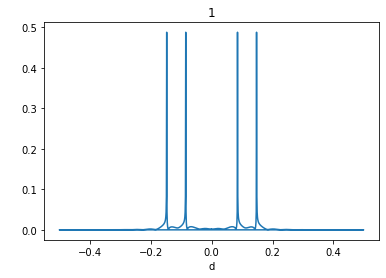

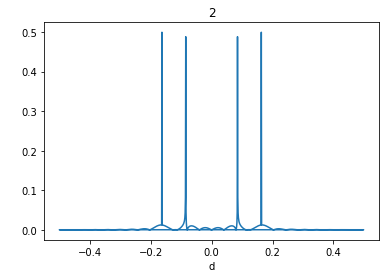

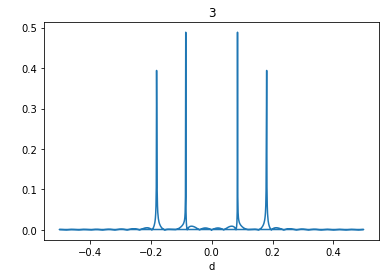

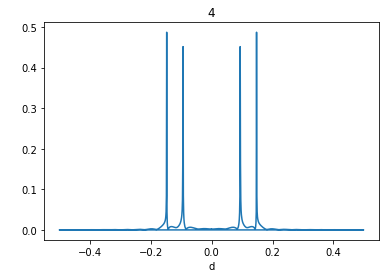

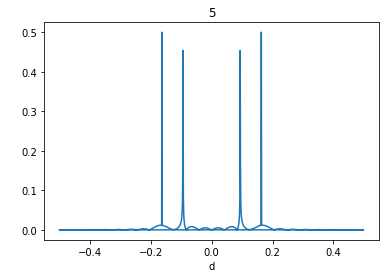

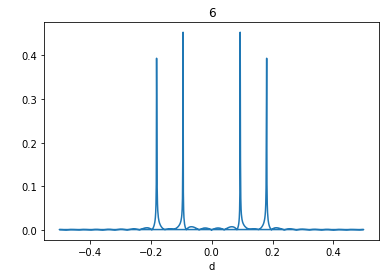

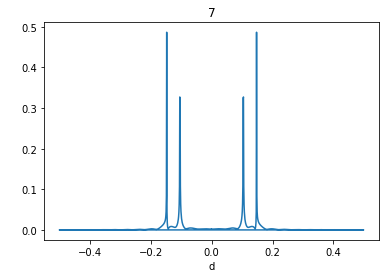

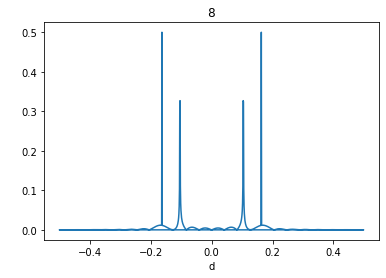

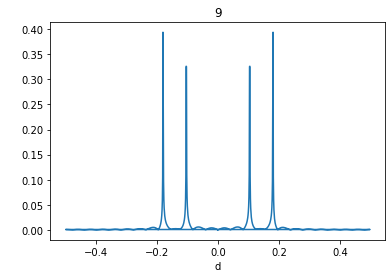

In [ ]:
from numpy import fft

plt.figure(figsize=(20, 10))
w = [[0.7217, 1.0247], [0.5346, 0.9273], [0.5346, 1.0247], [0.5346, 1.1328], [0.5906, 0.9273],
           [0.5906, 1.0247], [0.5906, 1.1328], [0.6535, 0.9273], [0.6535, 1.0247], [0.6535, 1.1328]]


ar1000 = np.array([i for i in range(0, 1000)])
content = [[0] for i in range(10)]
for i in range(10):
        content[i] = np.sin(w[i][0]*ar1000) + np.sin(w[i][1]*ar1000)
for x in range(0,10):
  yVals = np.absolute(fft.fft(content[x], n=1024)) / len(content[x])
  xVals = fft.fftfreq(1024)
  draw(plt, xVals[:1024], yVals[:1024], str(x), "d", " ")

d)

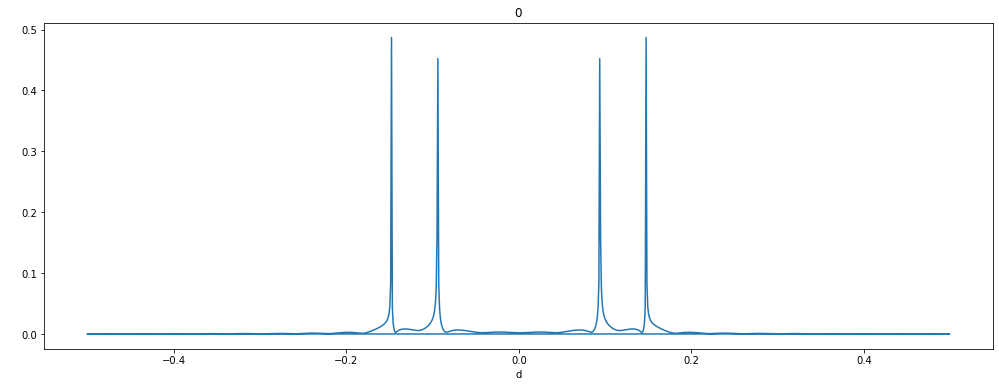

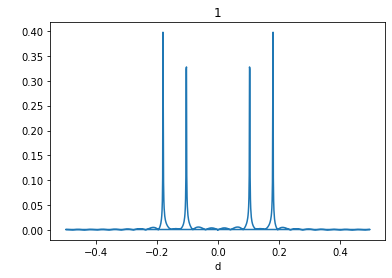

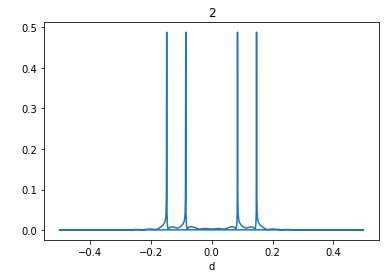

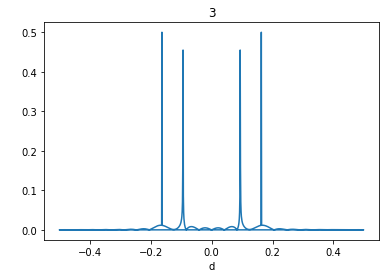

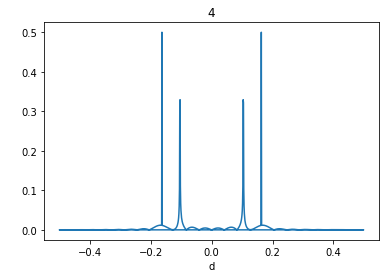

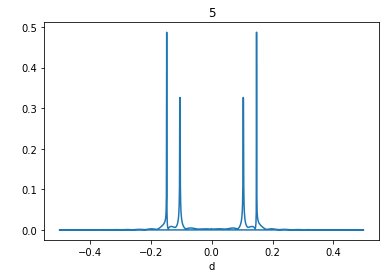

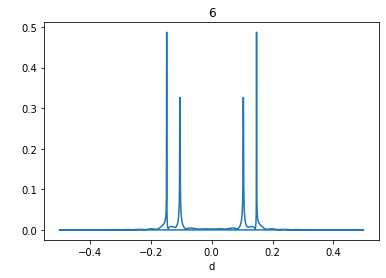

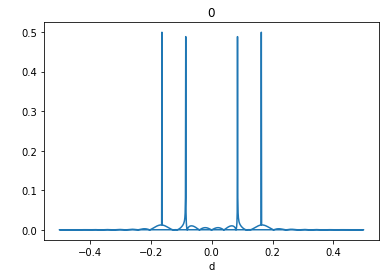

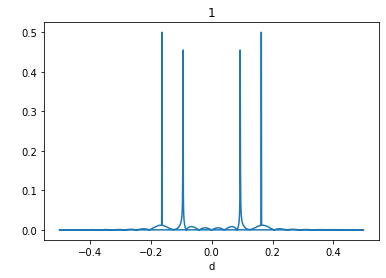

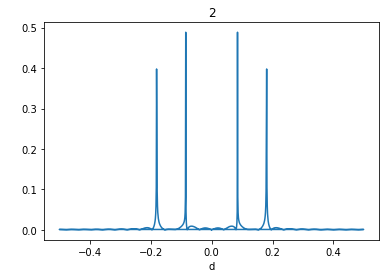

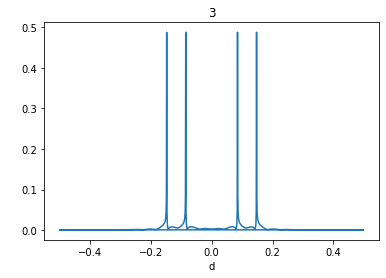

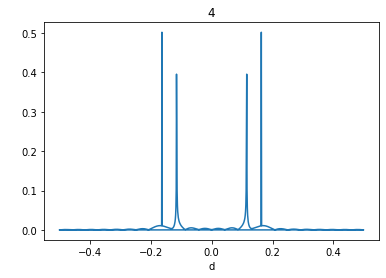

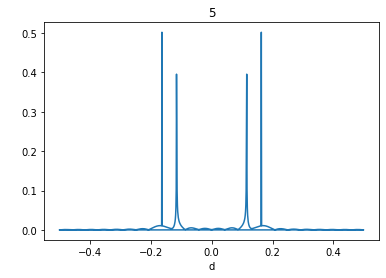

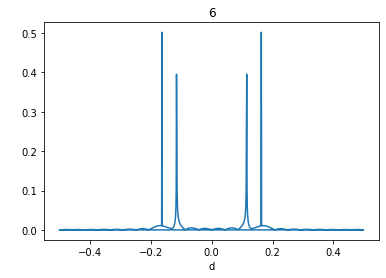

In [ ]:
phone1 = np.genfromtxt('/content/drive/My Drive/signal_csvs/phone1.csv', delimiter=',')
phone1 = list(phone1)
phone2 = np.genfromtxt('/content/drive/My Drive/signal_csvs/phone2.csv', delimiter=',')
phone2 = list(phone2)
hardPhone1 = np.genfromtxt('/content/drive/My Drive/signal_csvs/hard_phone1.csv', delimiter=',')
hardPhone1 = list(hardPhone1)
hardPhone2 = np.genfromtxt('/content/drive/My Drive/signal_csvs/hard_phone2.csv', delimiter=',')
hardPhone2 = list(hardPhone2)

plt.figure(figsize=(17, 6))
phone12 = [phone1, phone2]
for r in range(2):
  counter = 0
  content = [[0 for i in range(1000)] for j in range(7)]
  for x in range(0,7):
	  for i in range(0,1000):
		  content[x][i] = phone12[r][counter+i]
	  counter += 1100

  for x in range(7):
    yVals = np.absolute(fft.fft(content[x], n=1024)) / len(content[x])
    xVals = fft.fftfreq(1024)
    draw(plt, xVals[:1024], yVals[:1024], str(x), "d", " ")